<h1>Downloading the Dataset</h1>


In [84]:

import os

# Create the .kaggle directory
!mkdir -p ~/.kaggle

# Move the kaggle.json file to the .kaggle directory
!cp kaggle.json ~/.kaggle/

# Set the permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

# Install Kaggle CLI
!pip install kaggle

# Download the Alzheimer's Disease Dataset from Kaggle
dataset_name = 'rabieelkharoua/alzheimers-disease-dataset'

# Download the dataset using Kaggle API
!kaggle datasets download -d {dataset_name}

# Unzip the downloaded dataset
!unzip -o '*.zip' -d ./alzheimers_disease_dataset

# List the files to check the correct name
!ls ./alzheimers_disease_dataset

# Load the CSV file into a DataFrame
import pandas as pd
df = pd.read_csv('./alzheimers_disease_dataset/alzheimers_disease_data.csv')

# Display the first few rows of the DataFrame
df.head()


Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
alzheimers-disease-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  alzheimers-disease-dataset.zip
  inflating: ./alzheimers_disease_dataset/alzheimers_disease_data.csv  
alzheimers_disease_data.csv


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


# Importing Libraries

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [72]:
df.shape[0]

2149

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

## Summary Statistics


In [74]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


from matplotlib import pyplot as plt
_df_24['PatientID'].plot(kind='hist', bins=20, title='PatientID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['Gender'].plot(kind='hist', bins=20, title='Gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Ethnicity'].plot(kind='hist', bins=20, title='Ethnicity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='PatientID', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x='Age', y='Gender', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30.plot(kind='scatter', x='Gender', y='Ethnicity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31.plot(kind='scatter', x='Ethnicity', y='EducationLevel', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32['PatientID'].plot(kind='line', figsize=(8, 4), title='PatientID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_33['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_34['Gender'].plot(kind='line', figsize=(8, 4), title='Gender')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_35['Ethnicity'].plot(kind='line', figsize=(8, 4), title='Ethnicity')
plt.gca().spines[['top', 'right']].set_visible(False)

### Missing Values


In [75]:
df.isna().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

Hence, data has no missing values.

### Correlation with feature 'Diagnosis'

Removing columns like DoctorInCharge, Patient ID doesnt influence the target.Hence , they are removed.

Correlation heatmap is considered to show the relationship between other features and Diagnosis (Target variable)

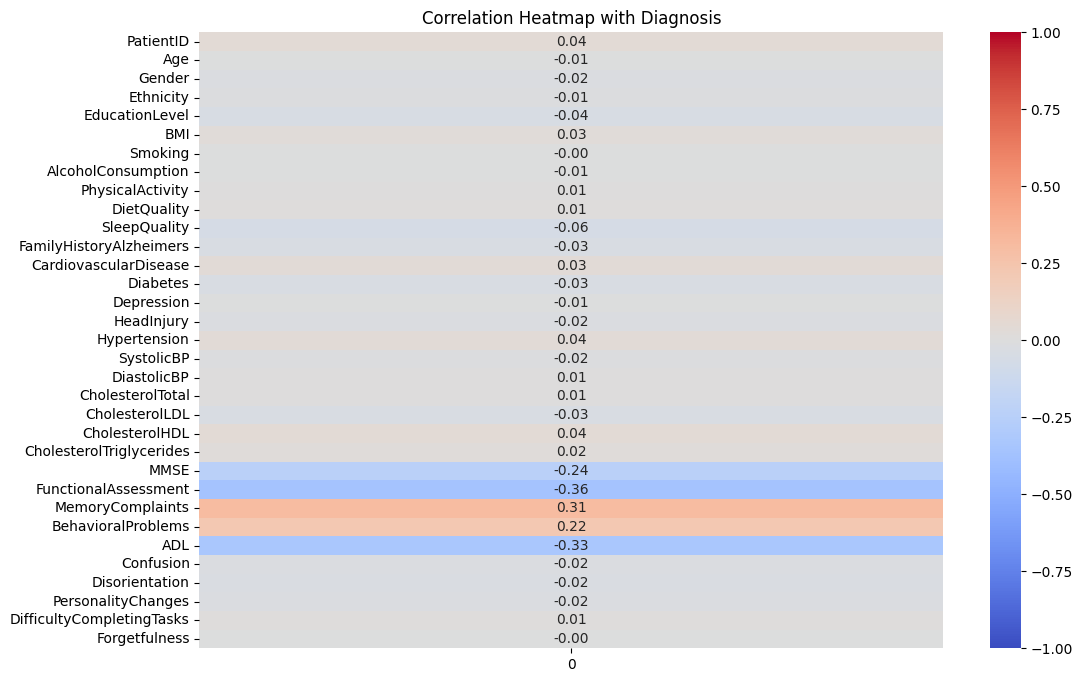

In [76]:

if 'DoctorInCharge' in df.columns:
    df = df.drop(columns=['DoctorInCharge'])
if 'Patient ID' in df.columns:
    df = df.drop(columns=['Patient ID'])

correlation_matrix = df.drop(columns=['Diagnosis']).corrwith(df['Diagnosis'])


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix.to_frame(), annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 10})
plt.title('Correlation Heatmap with Diagnosis')
plt.show()


#### Splitting Training and Testing data

In [77]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['Diagnosis']),df['Diagnosis'],test_size=0.2,random_state=42)

In [78]:
x_train.shape

(1719, 33)

In [79]:
x_test.shape

(430, 33)

#### Model Training

In [80]:
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [81]:
y_pred = model.predict(x_test)

In [82]:
accuracy_score(y_test, y_pred)

0.9279069767441861

<Figure size 800x600 with 0 Axes>

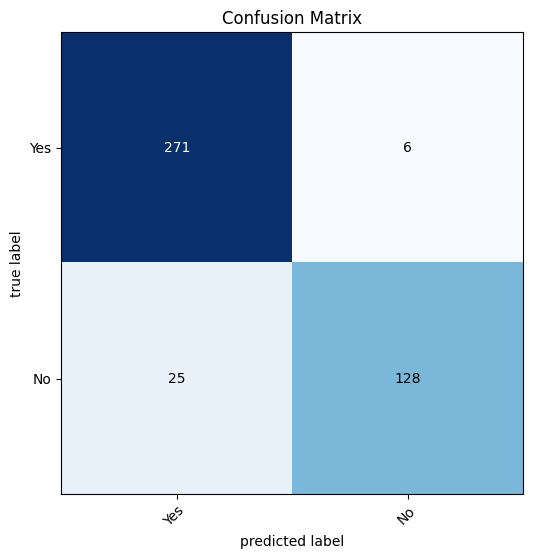

In [83]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, figsize=(8, 6), class_names=['Yes','No'])
plt.title('Confusion Matrix')
plt.show()

## RandomizedSearchCV

Improving models accuracy through `RandomizedSearchCV`

In [95]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'oob_score' : [True,False],
    'bootstrap': [True, False]
}

In [96]:
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100,
                                   scoring='accuracy', cv=5, random_state=42, n_jobs=-1)


random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=50,
                                                    random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300],
                                        'oob_score': [True, False]},
                   random_state=42, scoring='accuracy')

In [97]:
y_predict =  random_search.predict(x_test)

In [98]:
accuracy_score(y_test,y_predict)

0.9418604651162791

In [99]:
random_search.best_params_

{'oob_score': False,
 'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 30,
 'bootstrap': False}

RandomizedSearchCV has improved the models efficiency.

It claims using 300 estimators gives a right score.